In [3]:
import torch
import time
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath
import pathlib  as Path
#Model
model =torch.hub.load("./","custom",path="runs/train/expse/weights/best.pt",source="local")

YOLOv5  2024-3-5 Python-3.8.18 torch-1.8.2+cu102 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
YOLOv5m_SE summary: 218 layers, 20950908 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


In [4]:
# model.names = {0: "矮化叶病" , 1: "灰斑病", 2:"锈病",3:"叶斑病",4:"健康"}

In [5]:
type(model)

models.common.AutoShape

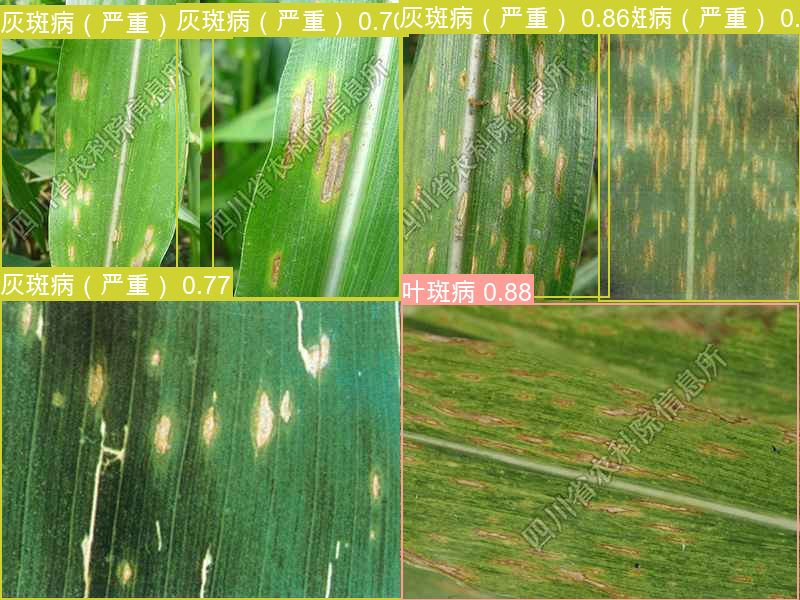

In [24]:
#imgs=[filename, path,url,opencv,pil,numpy]
img = "test/freecompress-test.jpeg"
#加缩放
# model.conf = 0.5
results =model(img)
results.show()

In [7]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,1.190156,0.608074,253.259354,555.0,0.961132,0,矮化叶病


In [10]:
print(results.pandas().xyxy[0])

         xmin        ymin        xmax        ymax  confidence  class     name
0  401.764709  303.315094  798.229492  600.000000    0.877178      1      叶斑病
1  399.052673    0.112181  609.356384  297.588379    0.856537      4  灰斑病（严重）
2    0.000000  299.175079  402.724762  599.755737    0.774212      4  灰斑病（严重）
3  598.765381    0.000000  800.000000  301.554260    0.747531      4  灰斑病（严重）
4  176.594315    3.961725  402.536377  298.854401    0.698788      4  灰斑病（严重）
5    0.308847    5.401468  213.002441  300.024414    0.402494      4  灰斑病（严重）


In [11]:
result=results.pandas().xyxy[0]
print(type(result))

<class 'pandas.core.frame.DataFrame'>


In [18]:
df = results.pandas().xyxy[0]
# 创建一个空字典用于存储class对应的最大confidence
class_max_confidence_dict = {}

# 遍历DataFrame的每一行
for index, row in df.iterrows():
    # 获取当前行的class和confidence
    class_id = row['class']
    confidence = float(row['confidence'])  # 将字符串类型转换为数值类型

    # 如果当前类别的置信度大于之前记录的最大值，则更新最大值
    if class_id not in class_max_confidence_dict or confidence > class_max_confidence_dict[class_id]:
        class_max_confidence_dict[class_id] = confidence

# 打印存储结果
for class_id, max_confidence in class_max_confidence_dict.items():
    print("Class ID:", class_id)
    print("Max Confidence:", max_confidence)


Class ID: 1
Max Confidence: 0.8771775364875793
Class ID: 4
Max Confidence: 0.8565368056297302
